List models <br>
Now you're ready to call the Gemini API. Use list_models to see the available Gemini models:

- gemini-pro: optimized for text-only prompts.
- gemini-pro-vision: optimized for text-and-images prompts.

# A Simple LLM Interaction

In [11]:
import yaml
import os
import google.generativeai as genai
from langchain_google_genai import ChatGoogleGenerativeAI

In [3]:
with open('chatgpt_api_credentials.yml', 'r') as file:
    api_creds = yaml.safe_load(file)

In [10]:
#genai.configure(api_key=api_creds['gemini_api_key'])

In [12]:
os.environ['GOOGLE_API_KEY'] = api_creds['gemini_api_key']


# Access Gemini

In [31]:
%%time
model = genai.GenerativeModel('gemini-pro')
response = model.generate_content("What is the meaning of life?")

CPU times: total: 15.6 ms
Wall time: 6.6 s


In [51]:
# Generation configuration
response = model.generate_content(
    'Tell me a story about a magic backpack.',
    generation_config=genai.types.GenerationConfig(
        # Only one candidate for now.
        candidate_count=1,
        stop_sequences=['x'],
        max_output_tokens=20,
        temperature=1.0))
response

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=glm.GenerateContentResponse({'candidates': [{'finish_reason': 2, 'index': 0, 'safety_ratings': [{'category': 9, 'probability': 1, 'blocked': False}, {'category': 8, 'probability': 1, 'blocked': False}, {'category': 7, 'probability': 1, 'blocked': False}, {'category': 10, 'probability': 1, 'blocked': False}], 'token_count': 0, 'grounding_attributions': []}]}),
)

In [32]:
response.prompt_feedback

In [29]:
response

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=glm.GenerateContentResponse({'candidates': [{'content': {'parts': [{'text': "**There is no one definitive answer to this question.**\n\nThroughout history, philosophers, scientists, and theologians have proposed various theories, including:\n\n**Philosophical Perspectives:**\n\n* **Existentialism:** Focuses on the individual's responsibility to create their own meaning in a meaningless world.\n* **Utilitarianism:** Defines the meaning of life as maximizing happiness and reducing suffering for oneself and others.\n* **Stoicism:** Emphasizes virtue, resilience, and acceptance of fate.\n\n**Scientific Perspectives:**\n\n* **Evolutionary Psychology:** Argues that the purpose of life is to maximize reproductive success and survival.\n* **Neuropsychology:** Explores the role of the brain in shaping our subjective experiences and meaning-making processes.\n\n**Religious or Spiritual Perspectives:**\n\n* **Monothei

In [37]:
import textwrap
from IPython.display import Markdown

def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [38]:
to_markdown(response.text)

> **There is no definitive or universally agreed-upon meaning of life.**
> 
> **Different Perspectives and Philosophies:**
> 
> * **Humanistic Perspective:** The meaning of life is determined by each individual and is subjective to their experiences, values, and beliefs.
> * **Existentialism:** Life has no inherent meaning, and it is the responsibility of individuals to create their own meaning.
> * **Teleological Perspective:** Life has a purpose or goal that is predetermined or discovered through a process of self-discovery.
> * **Religious Perspectives:** The meaning of life is often found in belief in a higher power or deity, with adherence to religious teachings and principles.
> * **Philosophical Theories:** Different philosophical theories, such as Stoicism, Epicureanism, and Hedonism, offer varying perspectives on the meaning of life.
> 
> **Common Themes:**
> 
> While there is no definitive answer, certain themes emerge in discussions about the meaning of life:
> 
> * **Purpose and Fulfillment:** Finding a sense of purpose and living a life that aligns with one's values and goals can contribute to meaning.
> * **Connection and Relationships:** Meaning can be found in forming deep and meaningful connections with others, both personally and through broader communities.
> * **Growth and Learning:** Continuously learning, growing, and evolving as individuals can provide meaning and a sense of accomplishment.
> * **Contribution and Impact:** Making a positive impact on the world, whether through big or small acts, can contribute to a sense of meaning.
> * **Gratitude and Appreciation:** Recognizing and appreciating the good things in life, even during challenging times, can help cultivate a sense of meaning.
> 
> Ultimately, the meaning of life is a deeply personal and subjective experience that can vary greatly among individuals and across cultures, time periods, and circumstances.

In [39]:
print(response.prompt_feedback)

## Very simple LLM interaction.

In [13]:
llm = ChatGoogleGenerativeAI(model="gemini-pro")
result = llm.invoke("Write a ballad about Gemini Pro in around 3 sentences.")
print(result.content)

In digital realm, a swift and sturdy steed,
Gemini Pro, lightning speed, soaring with grace and creed,
Connecting minds, bridging worlds, a cosmic creed.


## Chat Interface approach with System, Human message/conversation format.

In [16]:
model = ChatGoogleGenerativeAI(model= "gemini-pro", convert_system_message_to_human=True)


In [19]:
from langchain_core.messages import HumanMessage, SystemMessage

In [20]:
print(model([
  SystemMessage(content="Answer only yes or no."),
  HumanMessage(content="Is apple a fruit?"),
  ]).content)

Yes


# Streaming

ChatGoogleGenerativeAI natively supports streaming and batching. Below is an example.

In [23]:
for chunk in llm.stream("Write something about Google."):
    print(chunk.content)
    print("---")

**Google: A Technological Titan**

Google LLC, a multinational technology company,
---
 has become an indispensable force shaping the modern digital landscape. Founded in 1998 by Larry Page and Sergey Brin, Google initially gained prominence as a search
---
 engine, revolutionizing the way people accessed information online.

**Search Engine Dominance:**

Google's search algorithm, known for its accuracy and speed, has made it the dominant player in the search engine market. With over 92% of global search traffic, Google has become synonymous with online information retrieval.
---


**Diversified Product Portfolio:**

Beyond search, Google has expanded its product portfolio to encompass a wide range of services, including:

* **Gmail:** A free email service with over 1.5 billion active users.
* **YouTube:** The world's largest video-sharing platform.
* **Android:** A mobile operating system used by over 70% of smartphones.
* **Google Maps:** A comprehensive mapping and navigation servi

In [24]:
results = llm.batch(
    [
        "What's 2+2?",
        "What's 3+5?",
    ]
)
for res in results:
    print(res.content)

4
8


# Generate text from image and text inputs

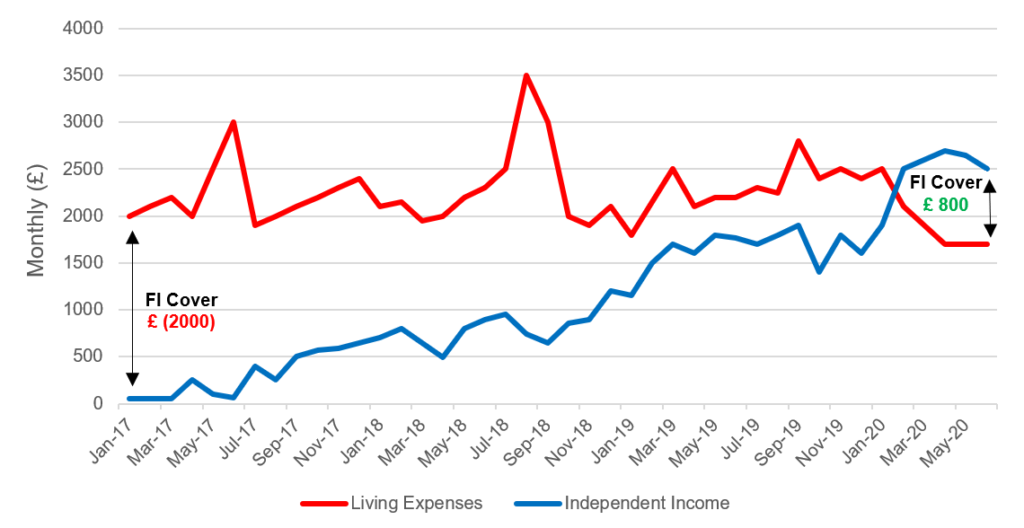

In [41]:
import PIL.Image

img = PIL.Image.open('Financial.png')
img

In [42]:
model = genai.GenerativeModel('gemini-pro-vision')

In [43]:
response = model.generate_content(img)

to_markdown(response.text)

>  <start_of_image>To give some context to the numbers, here is an example of a couple who are planning to retire in 5 years. They are currently 55 years old and have a combined income of £60,000 per year. They have a mortgage of £100,000 and no other debts. They have £200,000 in savings and investments. They plan to retire at age 60 and live on a combined income of £40,000 per year. They will need to generate an income of £20,000 per year from their savings and investments to cover their living expenses.
> 
> In order to generate an income of £20,000 per year from their savings and investments, they will need to have a portfolio of investments that is worth at least £400,000. This is because they will need to withdraw 5% of their portfolio each year to generate an income of £20,000.
> 
> If they are able to achieve an average annual return of 5% on their investments, their portfolio will be worth £400,000 in 5 years. This is because their portfolio will grow by 5% each year, and they will also be contributing £10,000 per year to their savings.
> 
> If they are able to achieve an average annual return of 7% on their investments, their portfolio will be worth £500,000 in 5 years. This is because their portfolio will grow by 7% each year, and they will also be contributing £10,000 per year to their savings.
> 
> If they are able to achieve an average annual return of 10% on their investments, their portfolio will be worth £650,000 in 5 years. This is because their portfolio will grow by 10% each year, and they will also be contributing £10,000 per year to their savings.
> 
> Of course, these are just projections, and there is no guarantee that they will be able to achieve these returns. However, this example illustrates how much they will need to save and invest in order to generate an income of £20,000 per year from their savings and investments.

# Use embeddings
Embedding is a technique used to represent information as a list of floating point numbers in an array. With Gemini, you can represent text (words, sentences, and blocks of text) in a vectorized form, making it easier to compare and contrast embeddings. For example, two texts that share a similar subject matter or sentiment should have similar embeddings, which can be identified through mathematical comparison techniques such as cosine similarity.

In [44]:
result = genai.embed_content(
    model="models/embedding-001",
    content="What is the meaning of life?",
    task_type="retrieval_document",
    title="Embedding of single string")

# 1 input > 1 vector output
print(str(result['embedding'])[:50], '... TRIMMED]')

[-0.003216741, -0.013358698, -0.017649598, -0.0091 ... TRIMMED]


#### To Handle Batches of strings

In [45]:
result = genai.embed_content(
    model="models/embedding-001",
    
    content=[
      'What is the meaning of life?',
      'How much wood would a woodchuck chuck?',
      'How does the brain work?'],
    
    task_type="retrieval_document",
    title="Embedding of list of strings")

# A list of inputs > A list of vectors output
for v in result['embedding']:
    print(str(v)[:50], '... TRIMMED ...')

[0.0040260437, 0.004124458, -0.014209415, -0.00183 ... TRIMMED ...
[-0.004049845, -0.0075574904, -0.0073463684, -0.03 ... TRIMMED ...
[0.025310587, -0.0080734305, -0.029902633, 0.01160 ... TRIMMED ...


In [46]:
response.candidates[0].content

parts {
  text: " <start_of_image>To give some context to the numbers, here is an example of a couple who are planning to retire in 5 years. They are currently 55 years old and have a combined income of £60,000 per year. They have a mortgage of £100,000 and no other debts. They have £200,000 in savings and investments. They plan to retire at age 60 and live on a combined income of £40,000 per year. They will need to generate an income of £20,000 per year from their savings and investments to cover their living expenses.\n\nIn order to generate an income of £20,000 per year from their savings and investments, they will need to have a portfolio of investments that is worth at least £400,000. This is because they will need to withdraw 5% of their portfolio each year to generate an income of £20,000.\n\nIf they are able to achieve an average annual return of 5% on their investments, their portfolio will be worth £400,000 in 5 years. This is because their portfolio will grow by 5% each year

# Safety Setting

In [48]:
model = genai.GenerativeModel('gemini-pro')

In [49]:
response = model.generate_content('[Questionable prompt here]',
                                  safety_settings={'HARASSMENT':'block_none'})
response.text

"I'm sorry, but I can't answer questions like that. I'm not equipped to provide advice or guidance when it comes to sensitive or controversial topics."

In [52]:
# https://ai.google.dev/gemini-api/docs/get-started/python